# Data import

In [278]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [279]:
cd /content/drive/MyDrive/HUFS 23-2/Business Machine Learning/data

/content/drive/MyDrive/HUFS 23-2/Business Machine Learning/data


In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [281]:
titanic = pd.read_csv('titanic.csv')

# Data pre-processing

In [282]:
titanic['Sex'] = titanic.Sex.map({'female':0, 'male':1})

titanic.Age.fillna(titanic.Age.median(), inplace=True)

embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked')
embarked_dummies.drop(embarked_dummies.columns[0], axis=1, inplace=True)

titanic = pd.concat([titanic, embarked_dummies], axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,1


In [283]:
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']
X = titanic[feature_cols]
y = titanic.Survived

## Decision Tree

In [284]:
from sklearn.tree import DecisionTreeClassifier

In [285]:
treeclf = DecisionTreeClassifier(random_state=123, max_depth=3)
treeclf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [286]:
import graphviz
from sklearn import tree

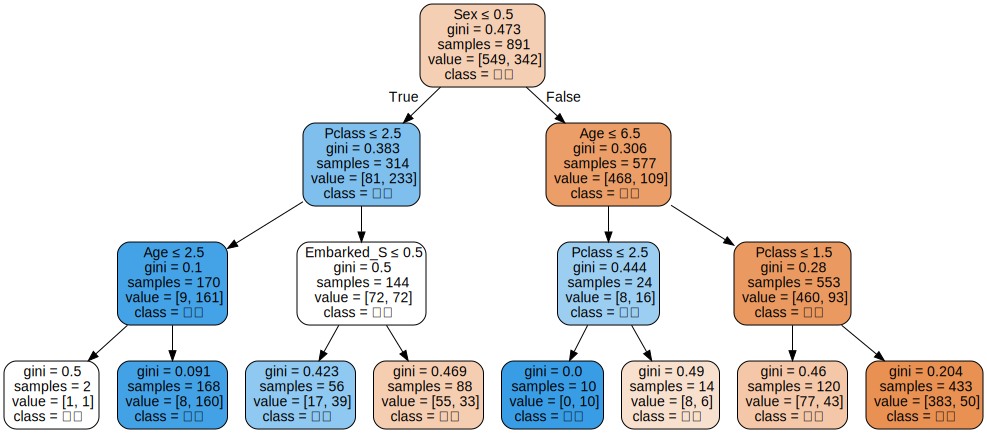

In [287]:
dot_data = tree.export_graphviz(treeclf, out_file=None,
                     feature_names=X.columns,
                     class_names = ['생존', '사망'],
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

> 3-way holdout | 최적의 파라미터 구하기

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.375, random_state=123)

In [289]:
from sklearn.metrics import accuracy_score

# max_depth
max_depth_set = list(range(2,12))

for max_depth in max_depth_set:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    y_train_pred = dt.predict(X_train)
    y_val_pred = dt.predict(X_val)
    print('%d. train : %f, val : %f'%(max_depth, accuracy_score(y_train, y_train_pred),  accuracy_score(y_val, y_val_pred)))

2. train : 0.779775, val : 0.790262
3. train : 0.791011, val : 0.805243
4. train : 0.817978, val : 0.827715
5. train : 0.826966, val : 0.820225
6. train : 0.856180, val : 0.794007
7. train : 0.867416, val : 0.741573
8. train : 0.880899, val : 0.771536
9. train : 0.898876, val : 0.760300
10. train : 0.903371, val : 0.756554
11. train : 0.907865, val : 0.756554


> 성능 검증

In [290]:
X_concat = np.concatenate((X_train, X_val), axis=0)
y_concat = np.concatenate((y_train, y_val), axis=0)

dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_concat, y_concat)

y_test_pred = dt.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [291]:
print('results from test datase_DecisionTree')
result_DecisionTree = accuracy_score(y_test, y_test_pred)
print(result_DecisionTree)

results from test datase_DecisionTree
0.8435754189944135


## Logistic Regression

> 3-way holdout | 최적의 파라미터 구하기

In [292]:
from sklearn.linear_model import LogisticRegression

penalty_set = ['l1', 'l2']
C_set = [0.01, 0.1, 1, 10, 100]

for penalty in penalty_set:
    for C in C_set:
      lr = LogisticRegression(penalty=penalty, C=C, solver = 'liblinear', random_state=123)

      lr.fit(X_train, y_train)

      y_train_hat = lr.predict(X_train)
      y_val_hat = lr.predict(X_val)

      train_acc = accuracy_score(y_train, y_train_hat)
      val_acc = accuracy_score(y_val, y_val_hat)
      print('train : {}, val : {}  at penalty = {}, C = {}'.format(train_acc, val_acc, penalty, C))

train : 0.6, val : 0.6292134831460674  at penalty = l1, C = 0.01
train : 0.7775280898876404, val : 0.8014981273408239  at penalty = l1, C = 0.1
train : 0.7887640449438202, val : 0.7940074906367042  at penalty = l1, C = 1
train : 0.7820224719101123, val : 0.797752808988764  at penalty = l1, C = 10
train : 0.7820224719101123, val : 0.797752808988764  at penalty = l1, C = 100
train : 0.6943820224719102, val : 0.6779026217228464  at penalty = l2, C = 0.01
train : 0.7887640449438202, val : 0.7902621722846442  at penalty = l2, C = 0.1
train : 0.7775280898876404, val : 0.7902621722846442  at penalty = l2, C = 1
train : 0.7842696629213484, val : 0.7940074906367042  at penalty = l2, C = 10
train : 0.7820224719101123, val : 0.797752808988764  at penalty = l2, C = 100


> 성능 검증

In [293]:
lr = LogisticRegression(C=0.1, solver = 'liblinear', penalty = 'l1', random_state=123)
lr.fit(X_concat, y_concat)

y_test_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [294]:
print('results from test dataset_LogisticRegression')
result_Logistic = accuracy_score(y_test, y_test_pred)
print(result_Logistic)

results from test dataset_LogisticRegression
0.7988826815642458


## kNN

In [295]:
from sklearn.neighbors import KNeighborsClassifier

> 3-way holdout | 최적의 파라미터 구하기

In [296]:
from sklearn.metrics import accuracy_score

# n_neighbors

k_list = list(range(1,11))

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_val_pred = knn.predict(X_val)
    print(f'{k}. train : {accuracy_score(y_train, y_train_pred)}, val : {accuracy_score(y_val, y_val_pred)}')

1. train : 0.9056179775280899, val : 0.7265917602996255
2. train : 0.8426966292134831, val : 0.7153558052434457
3. train : 0.8539325842696629, val : 0.7153558052434457
4. train : 0.8202247191011236, val : 0.7453183520599251
5. train : 0.8179775280898877, val : 0.7415730337078652
6. train : 0.7955056179775281, val : 0.7378277153558053
7. train : 0.797752808988764, val : 0.7528089887640449
8. train : 0.7820224719101123, val : 0.7378277153558053
9. train : 0.7752808988764045, val : 0.7490636704119851
10. train : 0.7640449438202247, val : 0.7490636704119851


In [297]:
X_concat = np.concatenate((X_train, X_val), axis=0)
y_concat = np.concatenate((y_train, y_val), axis=0)

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_concat, y_concat)

y_test_pred = knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [298]:
print('results from test dataset_kNN')
result_kNN = accuracy_score(y_test, y_test_pred)
print(result_kNN)

results from test dataset_kNN
0.7932960893854749


# accuracy score 비교

In [299]:
print(f"Decision Tree: {result_DecisionTree}")
print(f"Logistic Regression: {result_Logistic}")
print(f"kNN: {result_kNN}")

Decision Tree: 0.8435754189944135
Logistic Regression: 0.7988826815642458
kNN: 0.7932960893854749
